In [161]:
import numpy as np
import pandas as pd

In [162]:
PV_dataset = pd.read_csv('PV_Dataset.csv')

In [163]:
PV_dataset.head()

,time,PV power,Direct-in-plane,Sun Height,Air Temperature,Wind speed
0,20200101:0011,0.0,0.0,0.0,5.77,0.62
1,20200101:0111,0.0,0.0,0.0,5.78,1.10
2,20200101:0211,0.0,0.0,0.0,5.45,1.45
3,20200101:0311,0.0,0.0,0.0,4.76,1.79
4,20200101:0411,0.0,0.0,0.0,4.23,1.93


DATA PREPROCESSING

Spliting time column into Years, Months, Days and time

In [166]:
PV_dataset['year'] = PV_dataset['time'].str[:4]

In [167]:
PV_dataset.head()

,time,PV power,Direct-in-plane,Sun Height,Air Temperature,Wind speed,year
0,20200101:0011,0.0,0.0,0.0,5.77,0.62,2020
1,20200101:0111,0.0,0.0,0.0,5.78,1.10,2020
2,20200101:0211,0.0,0.0,0.0,5.45,1.45,2020
3,20200101:0311,0.0,0.0,0.0,4.76,1.79,2020
4,20200101:0411,0.0,0.0,0.0,4.23,1.93,2020


In [168]:
PV_dataset['month'] = PV_dataset['time'].str[4:6]
PV_dataset['day'] = PV_dataset['time'].str[6:8]
PV_dataset['hour_minute'] = PV_dataset['time'].str[9:]

In [169]:
PV_dataset.head()

,time,PV power,Direct-in-plane,Sun Height,Air Temperature,Wind speed,year,month,day,hour_minute
0,20200101:0011,0.0,0.0,0.0,5.77,0.62,2020,01,01,0011
1,20200101:0111,0.0,0.0,0.0,5.78,1.10,2020,01,01,0111
2,20200101:0211,0.0,0.0,0.0,5.45,1.45,2020,01,01,0211
3,20200101:0311,0.0,0.0,0.0,4.76,1.79,2020,01,01,0311
4,20200101:0411,0.0,0.0,0.0,4.23,1.93,2020,01,01,0411


In [170]:
PV_dataset = PV_dataset.drop(columns ='time', axis =1)

In [171]:
PV_dataset.head()

,PV power,Direct-in-plane,Sun Height,Air Temperature,Wind speed,year,month,day,hour_minute
0,0.0,0.0,0.0,5.77,0.62,2020,01,01,0011
1,0.0,0.0,0.0,5.78,1.10,2020,01,01,0111
2,0.0,0.0,0.0,5.45,1.45,2020,01,01,0211
3,0.0,0.0,0.0,4.76,1.79,2020,01,01,0311
4,0.0,0.0,0.0,4.23,1.93,2020,01,01,0411


In [172]:
PV_dataset.shape

(8788, 9)

In [173]:
PV_dataset['hour_minute'] = PV_dataset['hour_minute'].str[:2]

In [174]:
PV_dataset.head()

,PV power,Direct-in-plane,Sun Height,Air Temperature,Wind speed,year,month,day,hour_minute
0,0.0,0.0,0.0,5.77,0.62,2020,01,01,00
1,0.0,0.0,0.0,5.78,1.10,2020,01,01,01
2,0.0,0.0,0.0,5.45,1.45,2020,01,01,02
3,0.0,0.0,0.0,4.76,1.79,2020,01,01,03
4,0.0,0.0,0.0,4.23,1.93,2020,01,01,04


In [175]:
PV_dataset.columns

Index(['PV power', 'Direct-in-plane', 'Sun Height', 'Air Temperature',
       'Wind speed', 'year', 'month', 'day', 'hour_minute'],
      dtype='object')

In [176]:
# PV_dataset.to_csv('PV_dataset1.csv', index= False)

In [177]:
PV_dataset = PV_dataset[(PV_dataset[['PV power', 'Direct-in-plane', 'Sun Height']] != 0).any(axis=1)]

In [178]:
PV_dataset.head()

,PV power,Direct-in-plane,Sun Height,Air Temperature,Wind speed,year,month,day,hour_minute
9,0.00,0.83,2.15,4.12,2.07,2020,01,01,09
10,4.47,14.37,7.91,4.48,2.07,2020,01,01,10
11,9.70,22.45,11.94,5.47,2.07,2020,01,01,11
12,49.28,72.31,13.94,6.16,2.07,2020,01,01,12
13,108.50,139.14,13.73,6.93,2.55,2020,01,01,13


In [179]:
PV_dataset.shape

(4284, 9)

In [180]:
PV_dataset.describe()

,PV power,Direct-in-plane,Sun Height,Air Temperature,Wind speed
count,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000
mean,214.659526,268.723450,25.511391,11.612495,3.527453
std,214.262822,257.827156,16.071708,4.652839,1.739556
min,0.000000,0.830000,1.510000,-3.020000,0.070000
25%,42.482500,67.300000,12.337500,8.150000,2.210000
50%,137.235000,178.735000,22.360000,11.715000,3.450000
75%,339.137500,410.712500,38.170000,15.010000,4.620000
max,911.830000,1106.720000,60.270000,23.810000,10.210000


In [181]:
PV_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4284 entries, 9 to 8775
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PV power         4284 non-null   float64
 1   Direct-in-plane  4284 non-null   float64
 2   Sun Height       4284 non-null   float64
 3   Air Temperature  4284 non-null   float64
 4   Wind speed       4284 non-null   float64
 5   year             4284 non-null   object 
 6   month            4284 non-null   object 
 7   day              4284 non-null   object 
 8   hour_minute      4284 non-null   object 
dtypes: float64(5), object(4)
memory usage: 334.7+ KB


In [182]:
PV_dataset['month'] = PV_dataset['month'].astype(int)
PV_dataset['day'] = PV_dataset['day'].astype(int)
PV_dataset['hour_minute'] = PV_dataset['hour_minute'].astype(int)

In [183]:
PV_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4284 entries, 9 to 8775
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PV power         4284 non-null   float64
 1   Direct-in-plane  4284 non-null   float64
 2   Sun Height       4284 non-null   float64
 3   Air Temperature  4284 non-null   float64
 4   Wind speed       4284 non-null   float64
 5   year             4284 non-null   object 
 6   month            4284 non-null   int32  
 7   day              4284 non-null   int32  
 8   hour_minute      4284 non-null   int32  
dtypes: float64(5), int32(3), object(1)
memory usage: 284.5+ KB


In [184]:
PV_dataset.isnull().sum()

PV power           0
Direct-in-plane    0
Sun Height         0
Air Temperature    0
Wind speed         0
year               0
month              0
day                0
hour_minute        0
dtype: int64

In [185]:
PV_dataset = PV_dataset.drop(columns ='year', axis =1)

In [186]:
PV_dataset.to_csv('PV_dataset3.csv', index= False)

DATA VISUALIZATION

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

Correlation Matrix Heatmap

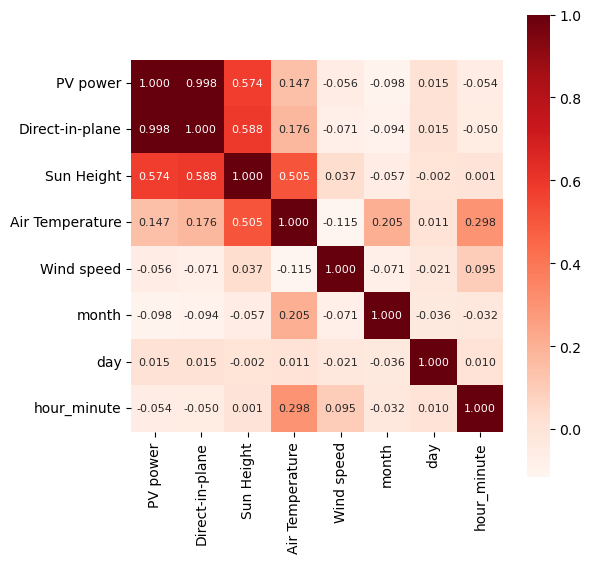

In [190]:
plt.figure(figsize = (6,6))
detaset_corr = PV_dataset.corr()
sns.heatmap(detaset_corr, cbar= True, square= True, fmt= '.3f', annot =True, annot_kws= {'size':8}, cmap= 'Reds')
plt.show()

Primary Influencer: The most significant factor impacting PV power generation is direct-in-plane radiation, showing that direct sunlight on the panel is crucial for power output.

Secondary Influencer: Sun Height moderately affects PV power, likely because it influences the amount of sunlight reaching the PV panel and it also depends on the hours of the day

Minimal Influence: Air temperature, wind speed, and temporal variables (year, month, day, hour) have little to no impact on PV power output. Higher temperatures might slightly increase power generation due to thermal effects, but extreme heat can reduce PV efficiency.

Time Series Plot of PV Power

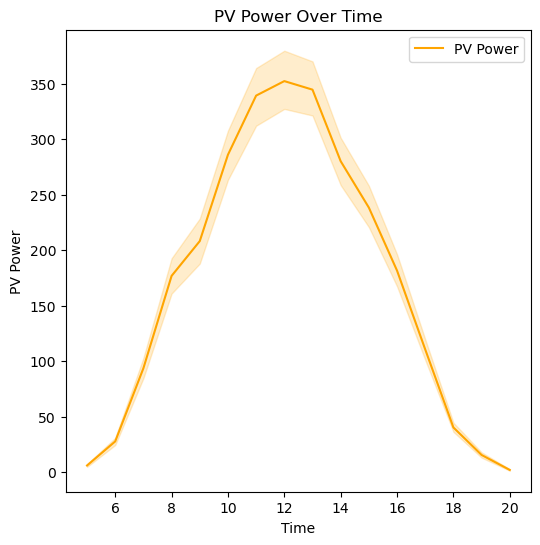

In [193]:
plt.figure(figsize=(6, 6))
sns.lineplot(data=PV_dataset, x='hour_minute', y='PV power', label='PV Power', color='orange')
plt.xlabel('Time')
plt.ylabel('PV Power')
plt.title('PV Power Over Time')
plt.legend()
plt.show()

Scatter Plot of Direct-in-plane vs. PV Power

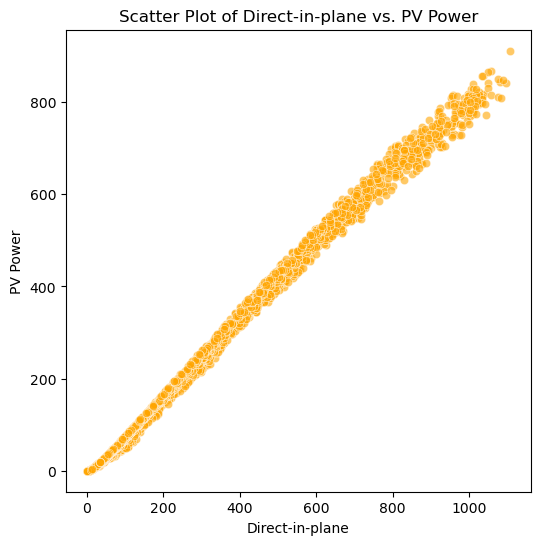

In [195]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=PV_dataset, x='Direct-in-plane', y='PV power', color='orange', alpha=0.6)
plt.xlabel('Direct-in-plane')
plt.ylabel('PV Power')
plt.title('Scatter Plot of Direct-in-plane vs. PV Power')
plt.show()

Heatmap of PV Power by Hour and Day

In [197]:
heatmap_data = PV_dataset.pivot_table(index='month', columns='hour_minute', values='PV power', aggfunc='mean')

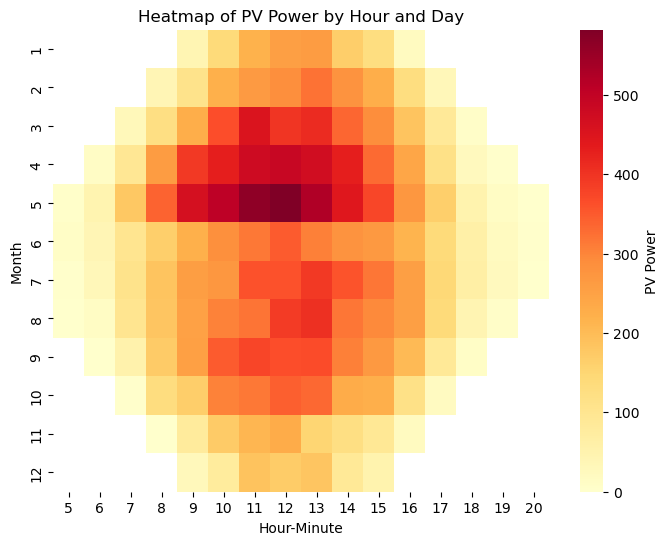

In [198]:
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', cbar_kws={'label': 'PV Power'})
plt.xlabel('Hour-Minute')
plt.ylabel('Month')
plt.title('Heatmap of PV Power by Hour and Day')
plt.show()

Sun Height vs. PV Power Scatter Plot

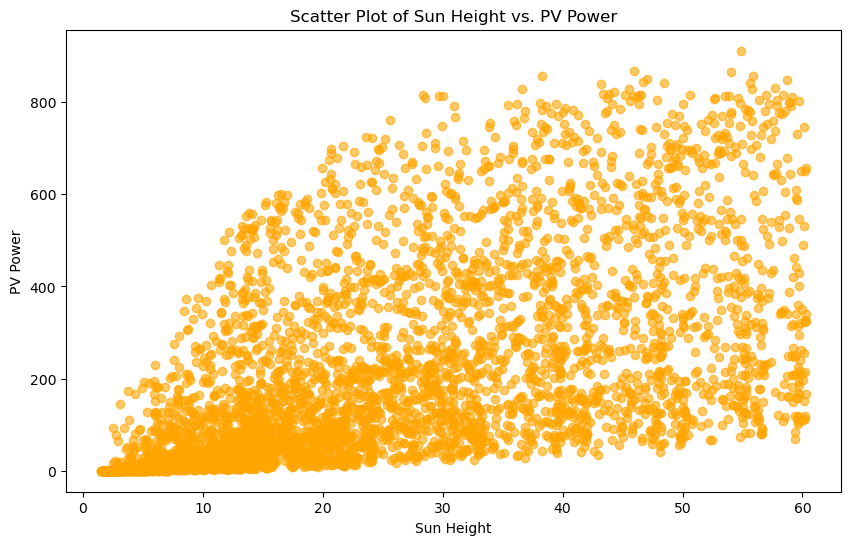

In [200]:
plt.figure(figsize=(10, 6))
plt.scatter(PV_dataset['Sun Height'], PV_dataset['PV power'], alpha=0.6, color='orange')
plt.xlabel('Sun Height')
plt.ylabel('PV Power')
plt.title('Scatter Plot of Sun Height vs. PV Power')
plt.show()

SPLITING DATASET INTO VARIABLES AND TARGET

In [202]:
X = PV_dataset.drop(columns = ['PV power'], axis= 1)
Y = PV_dataset['PV power']

In [203]:
X.head()

,Direct-in-plane,Sun Height,Air Temperature,Wind speed,month,day,hour_minute
9,0.83,2.15,4.12,2.07,1,1,9
10,14.37,7.91,4.48,2.07,1,1,10
11,22.45,11.94,5.47,2.07,1,1,11
12,72.31,13.94,6.16,2.07,1,1,12
13,139.14,13.73,6.93,2.55,1,1,13


In [204]:
Y.head()

9       0.00
10      4.47
11      9.70
12     49.28
13    108.50
Name: PV power, dtype: float64

SPLITING DATASET INTO TRAINING AND TEST DATA

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [207]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [208]:
X_train.shape, X_test.shape, Y_train.shape

((3427, 7), (857, 7), (3427,))

In [209]:
#!pip install xgboost lightgbm

MODEL TRAINING

In [211]:
# libraries for training model
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

In [212]:
# libraries for model accuracy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

MODEL TRAINING USING RANDOM FOREST REGRESSOR

In [214]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [215]:
test_data_prediction = model_rf.predict(X_test)

Model Accuracy 

In [217]:
test_data_r2 = r2_score(test_data_prediction, Y_test)
test_data_MAE = mean_absolute_error(test_data_prediction, Y_test)
test_data_MSE = mean_squared_error(test_data_prediction, Y_test)
print(f'The test data r2 score: {test_data_r2}')
print(f'The test data MAE score: {test_data_MAE}')
print(f'The test data MSE score: {test_data_MSE}')

The test data r2 score: 0.9994835273699214
The test data MAE score: 2.702947607934647
The test data MSE score: 23.976938419498182


Model Optimization

In [219]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
     'min_samples_split': [2, 5], 
}

In [220]:
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5,  n_jobs=-1, verbose=2, scoring='accuracy')

In [221]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [222]:
best_params = grid_search.best_params_

In [223]:
best_model_rf = grid_search.best_estimator_

In [224]:
test_prediction = best_model_rf.predict(X_test)
test_data_r2 = r2_score(test_prediction, Y_test)
test_data_MAE = mean_absolute_error(test_prediction, Y_test)
test_data_MSE = mean_squared_error(test_prediction, Y_test)
print(f'The testing data r2 score: {test_data_r2}')
print(f'The testing data MAE score: {test_data_MAE}')
print(f'The testing data MSE score: {test_data_MSE}')

The testing data r2 score: 0.9994420189959775
The testing data MAE score: 2.7209010501750326
The testing data MSE score: 25.86434312770136


In [225]:
Y_test_list= list(Y_test)

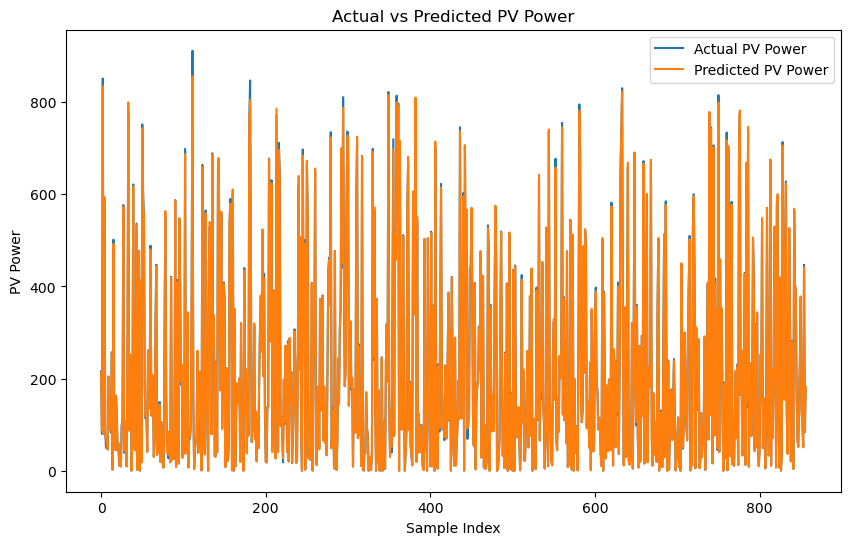

In [226]:
plt.figure(figsize=(10, 6))
plt.plot(Y_test_list, label='Actual PV Power')
plt.plot(test_prediction, label='Predicted PV Power')
plt.xlabel('Sample Index')
plt.ylabel('PV Power')
plt.title('Actual vs Predicted PV Power')
plt.legend()
plt.show()

MODEL TRAINING USING SUPPORT VECTOR MACHINE

In [228]:
model_svm = SVR()
model_svm.fit(X_train, Y_train)

SVR()

In [229]:
X_test_prediction = model_svm.predict(X_test)

Model Accuracy

In [231]:
test_data_r2 = r2_score(X_test_prediction, Y_test)
test_data_MAE = mean_absolute_error(X_test_prediction, Y_test)
test_data_MSE = mean_squared_error(X_test_prediction, Y_test)
print(f'The testing data r2 score: {test_data_r2}')
print(f'The testing data MAE score: {test_data_MAE}')
print(f'The testing data MSE score: {test_data_MSE}')

The testing data r2 score: 0.9487489980987205
The testing data MAE score: 15.88636929875181
The testing data MSE score: 1885.3723994214622


Model Optimization

In [233]:
param_grid = {
    'C': [0.1, 1],                  # Regularization parameter
    'kernel': ['linear', 'rbf'],      # Kernel type
    'epsilon': [0.01, 0.1]          # Epsilon parameter for the loss function
}

In [234]:
grid_search = GridSearchCV(estimator=model_svm, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

In [235]:
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'epsilon': [0.01, 0.1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [236]:
best_parans = grid_search.best_params_

In [237]:
best_model_svr = grid_search.best_estimator_

In [238]:
test_prediction = best_model_svr.predict(X_test)
test_data_r2 = r2_score(test_prediction, Y_test)
test_data_MAE = mean_absolute_error(test_prediction, Y_test)
test_data_MSE = mean_squared_error(test_prediction, Y_test)
print(f'The testing data r2 score: {test_data_r2}')
print(f'The testing data MAE score: {test_data_MAE}')
print(f'The testing data MSE score: {test_data_MSE}')

The testing data r2 score: 0.9971693430400803
The testing data MAE score: 6.754389262478457
The testing data MSE score: 136.0907929109939


In [239]:
Y_test_list = list(Y_test)

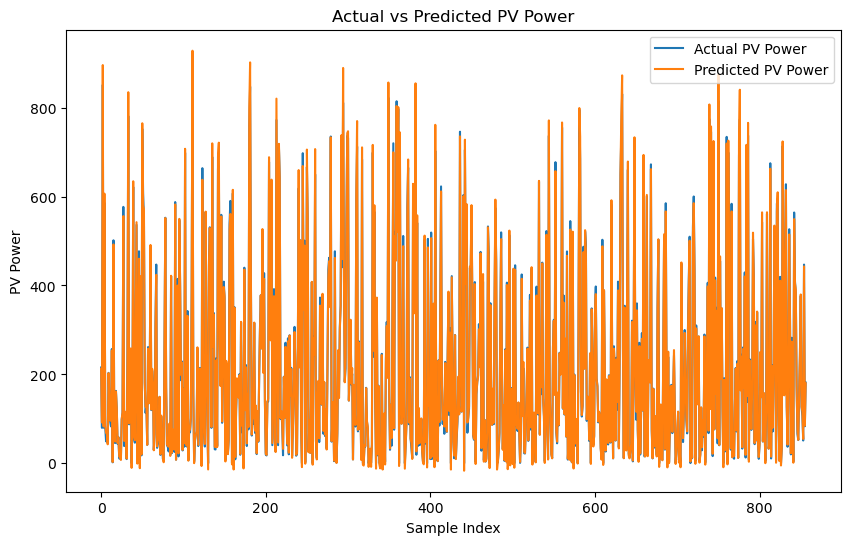

In [240]:
plt.figure(figsize=(10, 6))
plt.plot(Y_test_list, label='Actual PV Power')
plt.plot(test_prediction, label='Predicted PV Power')
plt.xlabel('Sample Index')
plt.ylabel('PV Power')
plt.title('Actual vs Predicted PV Power')
plt.legend()
plt.show()

MODEL TRAINING USING XGBREGRESSOR

In [242]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train, Y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [243]:
test_prediction = model_xgb.predict(X_test)
train_predition = model_xgb.predict(X_train)

Model Accuracy

In [245]:
test_data_r2 = r2_score(test_prediction, Y_test)
test_data_MAE = mean_absolute_error(test_prediction, Y_test)
test_data_MSE = mean_squared_error(test_prediction, Y_test)
print(f'The testing data r2 score: {test_data_r2}')
print(f'The testing data MAE score: {test_data_MAE}')
print(f'The testing data MSE score: {test_data_MSE}')

The testing data r2 score: 0.9996295836622004
The testing data MAE score: 2.357671398223055
The testing data MSE score: 17.147145834346997


In [246]:
train_data_r2 = r2_score(train_predition, Y_train)
train_data_MAE = mean_absolute_error(train_predition, Y_train)
train_data_MSE = mean_squared_error(train_predition, Y_train)
print(f'The testing data r2 score: {train_data_r2}')
print(f'The testing data MAE score: {train_data_MAE}')
print(f'The testing data MSE score: {train_data_MSE}')

The testing data r2 score: 0.9999850724292839
The testing data MAE score: 0.591891804088483
The testing data MSE score: 0.6821825320979902


Model Optimization

In [248]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0]
}

In [249]:
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

In [272]:
grid_search.fit(X_train,Y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
best_param = grid_search.best_params_

In [ ]:
best_model_xgb = grid_search.best_estimator_

In [ ]:
test_prediction = best_model_xgb.predict(X_test)

In [ ]:
test_data_r2 = r2_score(test_prediction, Y_test)
test_data_MAE = mean_absolute_error(test_prediction, Y_test)
test_data_MSE = mean_squared_error(test_prediction, Y_test)
print(f'The testing data r2 score: {test_data_r2}')
print(f'The testing data MAE score: {test_data_MAE}')
print(f'The testing data MSE score: {test_data_MSE}')

In [ ]:
Y_test_list = list(Y_test)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Y_test_list, label='Actual PV Power')
plt.plot(test_prediction, label='Predicted PV Power')
plt.xlabel('Sample Index')
plt.ylabel('PV Power')
plt.title('Actual vs Predicted PV Power')
plt.legend()
plt.show()

DEEP LEARN (ARTIFICIAL NEURAL NETWORK)

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
model_ANN = keras.Sequential([
    keras.layers.Flatten(input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Linear activation for regression
])

In [ ]:
model_ANN.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model_ANN.fit(X_train, Y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=1)

Model Accuracy

In [ ]:
loss, accuracy = model_ANN.evaluate(X_test, Y_test)
print(f'The accuracy of the model is {accuracy} and loss is {loss}')

In [ ]:
test_prediction = model_ANN.predict(X_test)

In [ ]:
test_data_r2 = r2_score(test_prediction, Y_test)
test_data_MAE = mean_absolute_error(test_prediction, Y_test)
test_data_MSE = mean_squared_error(test_prediction, Y_test)
print(f'The testing data r2 score: {test_data_r2}')
print(f'The testing data MAE score: {test_data_MAE}')
print(f'The testing data MSE score: {test_data_MSE}')

In [ ]:
Y_test_list = list(Y_test)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Y_test_list, label='Actual PV Power')
plt.plot(test_prediction, label='Predicted PV Power')
plt.xlabel('Sample Index')
plt.ylabel('PV Power')
plt.title('Actual vs Predicted PV Power')
plt.legend()
plt.show()

RESULT

In [ ]:
test_result = {
    'Model' : ['Random Forest', 'Support Vector Mechine', 'XGB Regressor', 'ANN'],
    'r2 score': [0.9994235196689834, 0.9971693430400803, 0.6377060347631502, 0.999138150386522],
    'MAE score': [2.7877603267211244, 6.754389262478457, 65.03356341581222, 5.1167571719468965], 
    'MSE score': [26.73472037661618, 136.0907929109939, 6622.369178604009, 39.49659721463826],
}

In [ ]:
test_result = pd.DataFrame(test_result)

In [ ]:
test_result

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x='Model', y='r2 score', data=test_result)
plt.title('R Square Test Result')
plt.xlabel('Model')
plt.ylabel('R Square')
plt.xticks(rotation=45)
plt.show()

MODEL PREDICTIVE SYSTEM 

In [ ]:
input_dataset = (139.14,13.73,6.93,2.55,1,1,13)
input_dataset_asarray = np.asarray(input_dataset)
input_data_reshape = input_dataset_asarray.reshape(1,-1)
prediction = best_model_rf.predict(input_data_reshape)
print(f'The PV Power output is {prediction}')